<a href="https://colab.research.google.com/github/sllpwlkr/Frameworks_7sem_Lupanova/blob/main/PSFII_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа №4: Случайный лес

## Задача классификации

### 2. Создание бейзлайна и оценка качества

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Загрузка данных
df = pd.read_csv('apple_quality.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
#Предобработка данных
print(df.head(1))
print(df.describe())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336    5.34633    -1.012009     1.8449   0.32984   

        Acidity Quality  
0  -0.491590483    good  
              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  4000.000000  4000.000000  
mean      0.512118     0.498277  
std       1.930286     1.8

In [ ]:
#Проверяем общее количество пропусков
total_missing = df.isnull().sum().sum()
print(f"Всего пропущенных значенийй: {total_missing}")

#Удаление строк с пропущенными значениями
initial_rows = len(df)
df_clean = df.dropna()
rows_after_cleaning = len(df_clean)
rows_removed = initial_rows - rows_after_cleaning

print(f"\nКоличество строк до удаления пропусков: {initial_rows}")
print(f"Удалено строк с пропущенными значениями: {rows_removed}")

#Сохраняем очищенный df
df = df_clean.copy()

Всего пропущенных значенийй: 8

Количество строк до удаления пропусков: 4001
Удалено строк с пропущенными значениями: 1


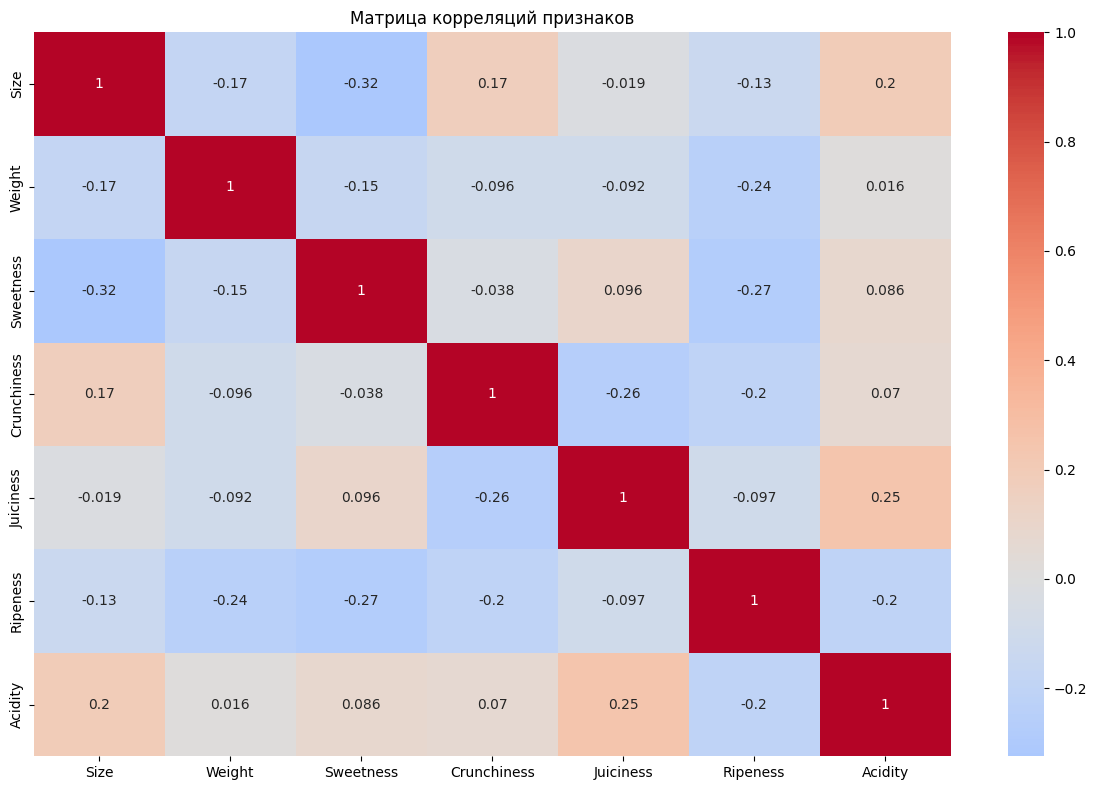

In [ ]:
#Матрица корреляций
plt.figure(figsize=(12, 8))
numeric_df = df.drop(['A_id', 'Quality'], axis=1)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций признаков')
plt.tight_layout()
plt.show()

In [ ]:
#Проверим баланс классов
print(df['Quality'].value_counts())

Quality
good    2004
bad     1996
Name: count, dtype: int64


In [ ]:
#Преобразуем целевую переменную из категориального в чиловой признак
le = LabelEncoder()
df['Quality_encoded'] = le.fit_transform(df['Quality'])
print(f"\nКодирование классов: {dict(zip(le.classes_, le.transform(le.classes_)))}")


Кодирование классов: {'bad': np.int64(0), 'good': np.int64(1)}


In [ ]:
#Удаляем колонку с id и разделяем датасет на фичи и целевую переменную
X = df.drop(['A_id', 'Quality', 'Quality_encoded'], axis=1)
y = df['Quality_encoded']

In [ ]:
#Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#Бейзлайн модель и предсказания
base_model = RandomForestClassifier()
base_model.fit(X_train, y_train)

y_pred = base_model.predict(X_test)


RandomForest Baseline:
Accuracy: 0.8892
Precision: 0.8901
Recall: 0.8892
F1-score: 0.8891


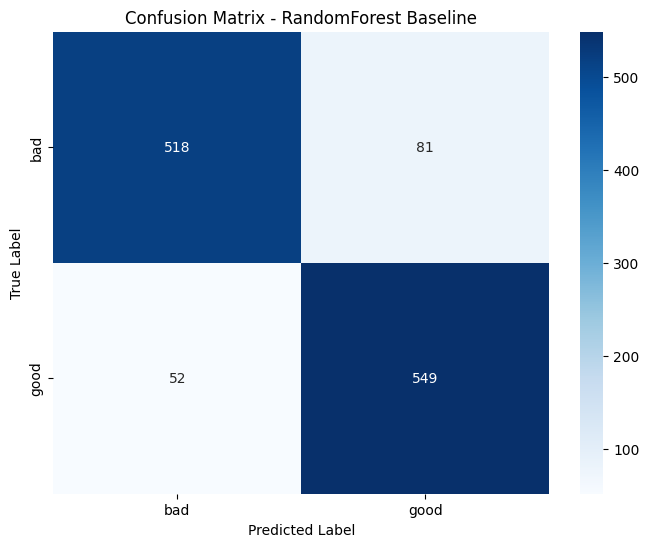

In [ ]:
#Оценка качества
def evaluate_model(y_true, y_pred, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Матрица ошибок
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
base_metrics = evaluate_model(y_test, y_pred, "RandomForest Baseline")

### 3. Улучшение бейзлайна

Гипотеза 1: масштабирование признаков

Гипотеза 2: подбор гиперпараметров модели

Гипотеза 3: создание новых полиномиальных признаков

Гипотеза 4: ОТбор наиболее важных признаков

In [ ]:
#Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Модель с масштабированными признаками
model_scaled = RandomForestClassifier()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)

In [ ]:
#Оценка метрик
print(f"Accuracy: {accuracy_score(y_test, y_pred_scaled):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_scaled):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_scaled):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_scaled):.4f}")

Accuracy: 0.8792
Precision: 0.8619
Recall: 0.9035
F1-score: 0.8822


Метрики модели после масштабирования изменились незначительно. Применение данной гипотезы не является целесообразным.

In [ ]:
#Подбор гиперпараметров с GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

rf_grid = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    rf_grid,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=1)

In [ ]:
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший F1-score: {grid_search.best_score_:.4f}")

Лучшие параметры: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Лучший F1-score: 0.8962


In [ ]:
#Модель с лучшими гиперпараметрами
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)


In [ ]:
#ОЦенка метрик
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best):.4f}")


Accuracy: 0.8817
Precision: 0.8614
Recall: 0.9101
F1-Score: 0.8851


Метрики не улучшились

In [ ]:
#Создание пониномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
print(f"\nРазмерность данных до полиномиального преобразования: {X_train.shape}")
print(f"Размерность данных после полиномиального преобразования: {X_train_poly.shape}")


Размерность данных до полиномиального преобразования: (2800, 7)
Размерность данных после полиномиального преобразования: (2800, 35)


In [ ]:
#Модель с полиномиальными признаками
model_new_features = RandomForestClassifier()
model_new_features.fit(X_train_poly, y_train)
y_pred_new_features = model_new_features.predict(X_test_poly)

In [ ]:
#Оценка метрик
print(f"Accuracy: {accuracy_score(y_test, y_pred_new_features):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_new_features):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_new_features):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_new_features):.4f}")

Accuracy: 0.8825
Precision: 0.8662
Recall: 0.9052
F1-score: 0.8853


Показало наименьшее падение Precision среди трех техник, при этом Recall вырос на 0.0160.

F1-score почти не изменилась, но все же немного ниже Baseline.

In [ ]:
#Определяем оптимальное количество признаков с помощью кросс-валидации
k_values = [5, 7, 9, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, X_train_poly.shape[1]]
k_scores = []

for k in k_values:
    if k <= X_train_poly.shape[1]:
        selector = SelectKBest(score_func=f_regression, k=k)
        X_train_selected = selector.fit_transform(X_train_poly, y_train)

        #Обучаем модель на отобранных признаках
        model_k = RandomForestClassifier()
        score = cross_val_score(model_k, X_train_selected, y_train,
                               cv=5, scoring='accuracy').mean()
        k_scores.append(score)
        print(f"k={k}: accuracy = {score:.4f}")

#Определяем оптимальное k
optimal_k = k_values[np.argmax(k_scores)]
print(f"\nОптимальное количество признаков: {optimal_k} (accuracy = {max(k_scores):.4f})")

k=5: accuracy = 0.8332
k=7: accuracy = 0.8571
k=9: accuracy = 0.8704
k=10: accuracy = 0.8725
k=12: accuracy = 0.8704
k=14: accuracy = 0.8768
k=16: accuracy = 0.8814
k=18: accuracy = 0.8821
k=20: accuracy = 0.8782
k=22: accuracy = 0.8846
k=24: accuracy = 0.8846
k=26: accuracy = 0.8893
k=28: accuracy = 0.8850
k=30: accuracy = 0.8886
k=35: accuracy = 0.8946

Оптимальное количество признаков: 35 (accuracy = 0.8946)



SelectKBest (k=35):
Accuracy: 0.8750
Precision: 0.8757
Recall: 0.8750
F1-score: 0.8749


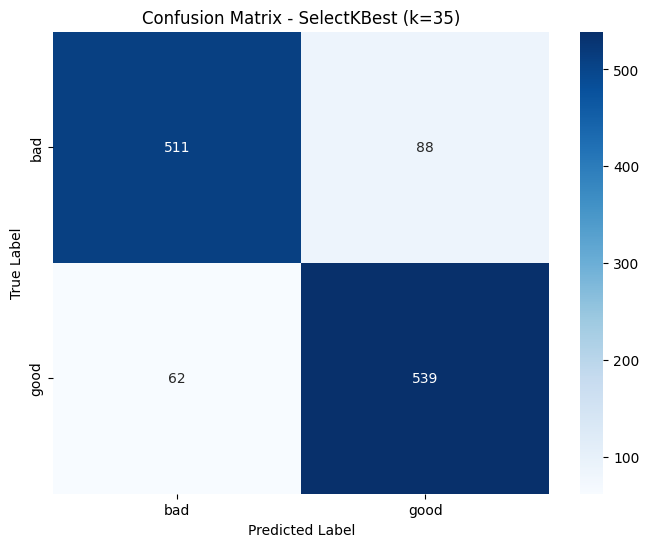

In [ ]:
#Применяем SelectKBest с оптимальным k
selector_kbest = SelectKBest(score_func=f_regression, k=optimal_k)
X_train_kbest = selector_kbest.fit_transform(X_train_poly, y_train)
X_test_kbest = selector_kbest.transform(X_test_poly)

#Обучаем модель на отобранных признаках
model_kbest = RandomForestClassifier()
model_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = model_kbest.predict(X_test_kbest)

metrics_kbest = evaluate_model(y_test, y_pred_kbest, f"SelectKBest (k={optimal_k})")

Создание новых признаков и выобр лучших не улучшили метрики

Таким образом ни одна из гипотез не подходит для того чтобы улучшить модель.


Impoved RandomForest:
Accuracy: 0.8875
Precision: 0.8887
Recall: 0.8875
F1-score: 0.8874


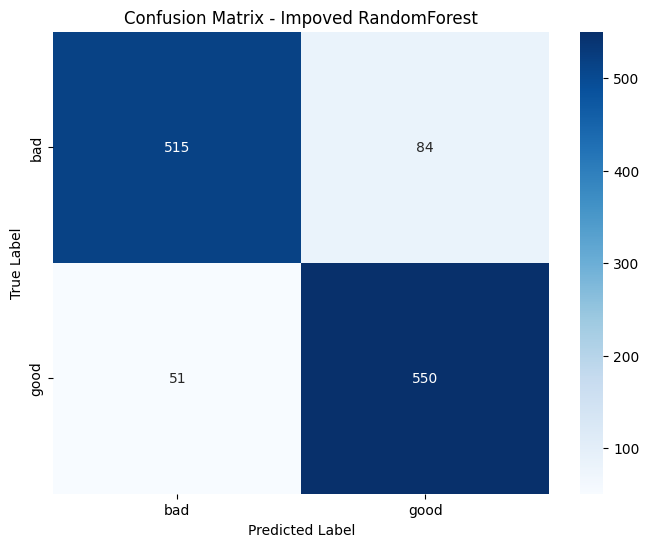

In [ ]:
#Модель с применением гипотез
model_impoved = RandomForestClassifier(min_samples_leaf = 1, min_samples_split = 2, n_estimators = 300)
model_impoved.fit(X_train_kbest, y_train)
y_pred_impr= model_impoved.predict(X_test_kbest)

improved_metrics = evaluate_model(y_test, y_pred_impr, 'Impoved RandomForest')

In [ ]:
#Сравнение базовой и улучшенной моделей
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Base Model': [
        base_metrics['accuracy'],
        base_metrics['precision'],
        base_metrics['recall'],
        base_metrics['f1']
    ],
    'Improved Model': [
        improved_metrics['accuracy'],
        improved_metrics['precision'],
        improved_metrics['recall'],
        improved_metrics['f1']
    ]
})
print(comparison)

      Metric  Base Model  Improved Model
0   Accuracy    0.889167        0.887500
1  Precision    0.890069        0.888666
2     Recall    0.889167        0.887500
3   F1-Score    0.889097        0.887410


Бейзлайн модель RandomForest с исходными 7 признаками показывает наилучшее качество классификации. Все попытки улучшения через стандартные техники не увенчались успехом.

### 4.	Имплементация алгоритма машинного обучения

In [ ]:
#Реализация Decision Tree для Random Forest
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        #Преобразуем в numpy массивы
        if not isinstance(X, np.ndarray):
            X = X.values if hasattr(X, 'values') else np.array(X)
        if not isinstance(y, np.ndarray):
            y = y.values if hasattr(y, 'values') else np.array(y)

        self.n_classes = len(np.unique(y))
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        #Критерии остановки
        if (self.max_depth is not None and depth >= self.max_depth) or \
           (n_labels == 1) or \
           (n_samples < self.min_samples_split):
            leaf_value = np.argmax(np.bincount(y))
            return {'leaf': True, 'value': leaf_value}

        #Случайный выбор признаков
        feat_idxs = np.random.choice(n_features, max(1, int(np.sqrt(n_features))), replace=False)

        #Поиск лучшего разделения
        best_feat, best_thresh = self._best_split(X, y, feat_idxs)

        if best_feat is None:
            leaf_value = np.argmax(np.bincount(y))
            return {'leaf': True, 'value': leaf_value}

        #Разделение данных
        left_idxs = X[:, best_feat] <= best_thresh
        right_idxs = X[:, best_feat] > best_thresh

        #Проверяем, что разделение не пустое
        if sum(left_idxs) == 0 or sum(right_idxs) == 0:
            leaf_value = np.argmax(np.bincount(y))
            return {'leaf': True, 'value': leaf_value}

        #Рекурсивный рост
        left = self._grow_tree(X[left_idxs], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs], y[right_idxs], depth + 1)

        return {
            'leaf': False,
            'feature': best_feat,
            'threshold': best_thresh,
            'left': left,
            'right': right
        }

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            #Если только одно значение, пропускаем
            if len(thresholds) < 2:
                continue

            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        #Энтропия родителя
        parent_entropy = self._entropy(y)

        #Разделение
        left_idxs = X_column <= split_thresh
        right_idxs = X_column > split_thresh

        if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0:
            return 0

        #Взвешенная энтропия детей
        n = len(y)
        n_left, n_right = np.sum(left_idxs), np.sum(right_idxs)
        e_left, e_right = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_left / n) * e_left + (n_right / n) * e_right


        return parent_entropy - child_entropy

    def _entropy(self, y):
        if len(y) == 0:
            return 0
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def predict(self, X):
        #Преобразуем в numpy массив
        if not isinstance(X, np.ndarray):
            X = X.values if hasattr(X, 'values') else np.array(X)
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _traverse_tree(self, x, node):
        if node['leaf']:
            return node['value']

        if x[node['feature']] <= node['threshold']:
            return self._traverse_tree(x, node['left'])
        return self._traverse_tree(x, node['right'])

#Реализация Random Forest
class CustomRandomForest:
    def __init__(self, n_estimators=50, max_depth=10, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        #Преобразуем в numpy массивы
        if not isinstance(X, np.ndarray):
            X = X.values if hasattr(X, 'values') else np.array(X)
        if not isinstance(y, np.ndarray):
            y = y.values if hasattr(y, 'values') else np.array(y)

        self.trees = []
        n_samples = X.shape[0]

        for i in range(self.n_estimators):

            #Бутстрап выборка
            idxs = np.random.choice(n_samples, n_samples, replace=True)
            X_bootstrap = X[idxs]
            y_bootstrap = y[idxs]

            #Обучение дерева
            tree = DecisionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)

    def predict(self, X):
        #Преобразуем в numpy массив
        if not isinstance(X, np.ndarray):
            X = X.values if hasattr(X, 'values') else np.array(X)

        # Если только одно дерево
        if len(self.trees) == 1:
            return self.trees[0].predict(X)

        # Собираем предсказания от всех деревьев
        tree_preds = []
        for tree in self.trees:
            tree_preds.append(tree.predict(X))

        tree_preds = np.array(tree_preds)

        # Голосование большинством
        predictions = []
        for i in range(X.shape[0]):
            # Используем bincount для подсчета голосов
            votes = tree_preds[:, i]
            if len(votes) > 0:
                counts = np.bincount(votes.astype(int))
                prediction = np.argmax(counts)
                predictions.append(prediction)
            else:
                predictions.append(0)

        return np.array(predictions)

In [ ]:
#Обучение и предсказание кастомной модели
custom_rf = CustomRandomForest()
custom_rf.fit(X_train, y_train)

y_pred_custom = custom_rf.predict(X_test)


RanodomForest Custom:
Accuracy: 0.8700
Precision: 0.8706
Recall: 0.8700
F1-score: 0.8699


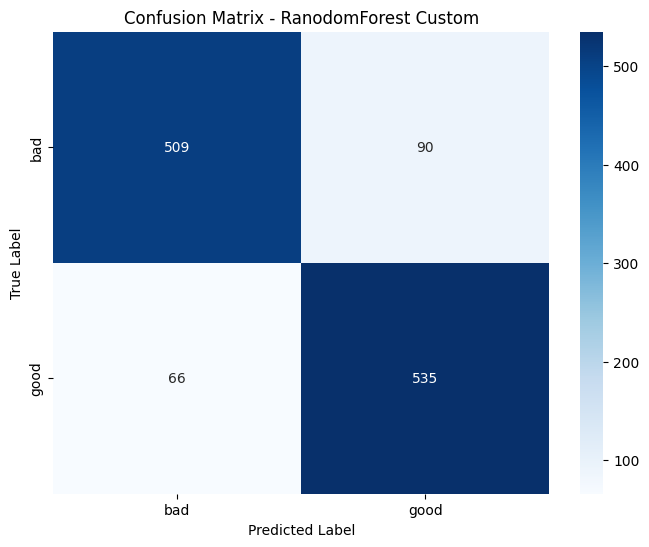

In [ ]:
#Оценка качества
custom_metrics = evaluate_model(y_test, y_pred_custom, "RanodomForest Custom")

In [ ]:
#Применяем лучшие гиперпараметры из GridSearch и увеличение признаков к кастомной модели
custom_improved = CustomRandomForest(min_samples_split = 2)
custom_improved.fit(X_train_poly, y_train)

y_pred_improved_custom= custom_improved.predict(X_test_poly)


RandomForest Improved Custom:
Accuracy: 0.8725
Precision: 0.8727
Recall: 0.8725
F1-score: 0.8725


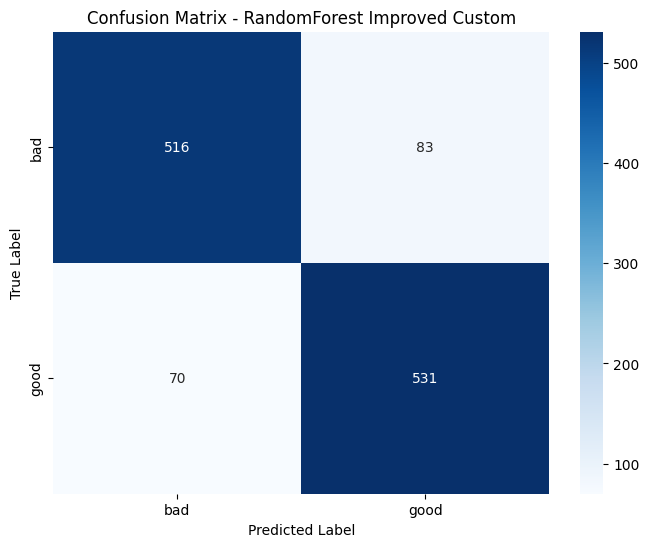

In [ ]:
#Оценка качества
custom_impoved_metrics = evaluate_model(y_test, y_pred_improved_custom, "RandomForest Improved Custom")

In [ ]:
#Сравнение всех метрик всех моделей
comparison_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Baseline RandomForest': [
        base_metrics['accuracy'],
        base_metrics['precision'],
        base_metrics['recall'],
        base_metrics['f1']
    ],
    'Improved RandomForest': [
        improved_metrics['accuracy'],
        improved_metrics['precision'],
        improved_metrics['recall'],
        improved_metrics['f1']
    ],
    'Custom RandomForest': [
        custom_metrics['accuracy'],
        custom_metrics['precision'],
        custom_metrics['recall'],
        custom_metrics['f1']
    ],
    'Custom Improved RandomForest': [
        custom_impoved_metrics['accuracy'],
        custom_impoved_metrics['precision'],
        custom_impoved_metrics['recall'],
        custom_impoved_metrics['f1']
    ]
})

print(comparison_metrics.to_string(index=False))

   Metric  Baseline RandomForest  Improved RandomForest  Custom RandomForest  Custom Improved RandomForest
 Accuracy               0.889167               0.887500             0.870000                      0.872500
Precision               0.890069               0.888666             0.870584                      0.872670
   Recall               0.889167               0.887500             0.870000                      0.872500
 F1-score               0.889097               0.887410             0.869944                      0.872483


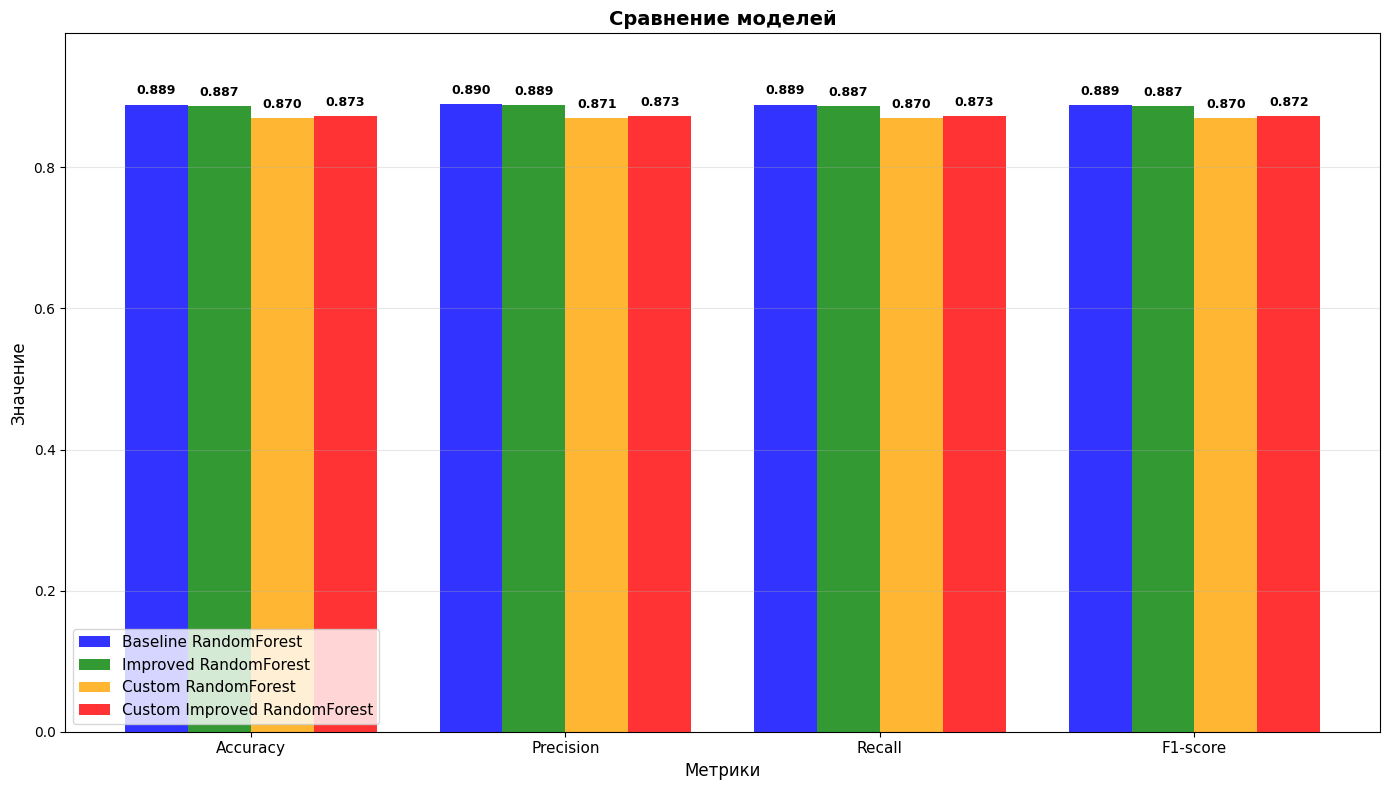

In [ ]:
#Визуализация сравнения
plt.figure(figsize=(14, 8))
x = np.arange(len(comparison_metrics))
width = 0.2

plt.bar(x - width*1.5, comparison_metrics['Baseline RandomForest'], width,
        label='Baseline RandomForest', alpha=0.8, color='blue')
plt.bar(x - width/2, comparison_metrics['Improved RandomForest'], width,
        label='Improved RandomForest', alpha=0.8, color='green')
plt.bar(x + width/2, comparison_metrics['Custom RandomForest'], width,
        label='Custom RandomForest', alpha=0.8, color='orange')
plt.bar(x + width*1.5, comparison_metrics['Custom Improved RandomForest'], width,
        label='Custom Improved RandomForest', alpha=0.8, color='red')

plt.xlabel('Метрики', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.title('Сравнение моделей', fontsize=14, fontweight='bold')
plt.xticks(x, comparison_metrics['Metric'], fontsize=11)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

#Добавляем значения над столбцами
for i in range(len(comparison_metrics)):
    plt.text(i - width*1.5, comparison_metrics['Baseline RandomForest'][i] + 0.01,
             f'{comparison_metrics["Baseline RandomForest"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(i - width/2, comparison_metrics['Improved RandomForest'][i] + 0.01,
             f'{comparison_metrics["Improved RandomForest"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(i + width/2, comparison_metrics['Custom RandomForest'][i] + 0.01,
             f'{comparison_metrics["Custom RandomForest"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(i + width*1.5, comparison_metrics['Custom Improved RandomForest'][i] + 0.01,
             f'{comparison_metrics["Custom Improved RandomForest"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Настраиваем пределы оси Y
max_val = max([comparison_metrics['Baseline RandomForest'].max(), comparison_metrics['Improved RandomForest'].max(), comparison_metrics['Custom RandomForest'].max(), comparison_metrics['Custom Improved RandomForest'].max()]) + 0.1
plt.ylim(0, min(max_val, 1.0))

plt.tight_layout()
plt.show()

Random Forest из библиотеки sklearn демонстрирует наилучшие результаты, достигая точности классификации 88.9% и сбалансированной F1-меры 88.9%. Кастомная реализация алгоритма показывает несколько более низкие показатели (87.0% точности), что объясняется упрощениями в реализации и отсутствием дополнительных оптимизаций. Применение методов улучшения (стандартизация данных, отбор признаков, подбор гипер параметров) дало незначительный прирост для кастомной модели, но не позволило превзойти оптимизированную версию sklearn.

## Задача регресии

### 2. Создание бейзлайна и оценка качества

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('pizza_dataset.csv')
df.head(5)

,id,date,time,name,size,type,price,diameter_cm,weight_g,calories_per_100g,...,cheese_percent,crust_type,sauce_type,filling_density,area_cm2,density_g_per_cm2,total_calories,cook_efficiency,ingredient_intensity,price_final
0,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25,29.498160,457.825488,279.125963,...,30.701562,regular,tomato,regular,683.061055,0.670256,1277.909802,0.309009,13.105430,50.00
1,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00,31.802857,481.340835,250.388400,...,16.691659,regular,tomato,regular,793.966056,0.606249,1205.221616,0.324397,6.232590,43.25
2,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00,30.927976,439.468001,222.409110,...,20.847359,regular,bbq,medium,750.883653,0.585268,977.416871,0.353923,11.377393,48.75
3,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75,36.394634,559.697009,248.607456,...,23.454774,regular,spicy_asian,regular,1039.786963,0.538280,1391.448496,0.384982,8.933405,59.50
4,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50,34.624075,568.288698,219.772790,...,39.873953,regular,tomato,medium,941.078833,0.603869,1248.943927,0.205297,10.558014,54.25


In [ ]:
df.describe()

,price,diameter_cm,weight_g,calories_per_100g,ingredient_count,complexity_score,cook_time_min,ingredient_cost,popularity_score,spiciness,cheese_percent,area_cm2,density_g_per_cm2,total_calories,cook_efficiency,ingredient_intensity,price_final
count,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000
mean,16.497762,30.690807,519.536413,280.118177,4.589321,4.715436,14.003510,10.670071,7.557020,1.641062,25.094816,760.464989,0.726839,1466.373133,0.337399,9.308713,49.368757
std,3.621954,5.178817,105.254349,41.468638,1.261791,1.584733,2.674232,2.130618,1.143916,0.848082,6.607897,248.667386,0.168644,411.329991,0.099527,3.600500,6.464381
min,9.750000,22.000067,221.577230,167.018611,3.000000,2.000000,4.661094,3.571696,3.215589,1.000000,15.000000,379.942312,0.348741,438.197968,0.108497,3.599621,28.250000
25%,12.750000,25.457615,441.250844,250.983063,4.000000,4.000000,12.131075,9.164775,6.747760,1.000000,19.920477,508.750760,0.602715,1168.892845,0.265424,6.697684,44.750000
50%,16.500000,30.647272,518.115671,280.101598,5.000000,5.000000,14.068492,10.624668,7.496350,1.000000,24.703116,737.315394,0.695078,1432.259760,0.334680,8.557001,49.250000
75%,20.250000,35.503520,595.925838,310.706355,5.000000,6.000000,15.893498,12.129966,8.320789,2.000000,29.665115,989.492420,0.829394,1725.405439,0.404105,11.190773,54.000000
max,35.950000,49.982993,853.363727,425.023101,8.000000,8.000000,24.361009,19.520416,10.000000,4.000000,50.000000,1961.165170,1.393794,3364.563092,0.869375,32.349101,72.750000


In [ ]:
#Идентификация категориальных признаков
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Категориальные признаки: {categorical_cols}")

#Изучим уникальные значения в каждом категориальном признаке
for col in categorical_cols:
    unique_vals = df[col].nunique()
    print(f"\n{col}:")
    print(f"  Уникальных значений: {unique_vals}")

Категориальные признаки: ['id', 'date', 'time', 'name', 'size', 'type', 'crust_type', 'sauce_type', 'filling_density']

id:
  Уникальных значений: 21350

date:
  Уникальных значений: 358

time:
  Уникальных значений: 16382

name:
  Уникальных значений: 32

size:
  Уникальных значений: 5

type:
  Уникальных значений: 4

crust_type:
  Уникальных значений: 5

sauce_type:
  Уникальных значений: 6

filling_density:
  Уникальных значений: 3


In [ ]:
#Обработка категориальных признаков
df_processed = df.copy()

#Удаляем исходные столбцы date, time и id
df_processed = df_processed.drop(['date', 'time', 'id'], axis=1)

#One-Hot для основных категориальных признаков
categorical_to_encode = ['size', 'type', 'crust_type', 'sauce_type', 'filling_density']

#Для name используем частотное кодирование, так как много уникальных значений
name_freq = df_processed['name'].value_counts(normalize=True)
df_processed['name_freq'] = df_processed['name'].map(name_freq)
df_processed = df_processed.drop('name', axis=1)

#One-Hot для остальных категориальных признаков
df_processed = pd.get_dummies(df_processed, columns=categorical_to_encode, drop_first=True)

print(f"Количество признаков после One-Hot Encoding: {df_processed.shape[1]}")

Количество признаков после One-Hot Encoding: 36


In [ ]:
#Обработка пропусков
missing_values = df_processed.isnull().sum()

if missing_values.sum() == 0:
    print("Пропусков в данных нет")
else:
    #Заполняем пропуски медианой для числовых и модой для категориальных
    for col in df_processed.columns:
        if df_processed[col].isnull().sum() > 0:
            if df_processed[col].dtype in ['int64', 'float64']:
                df_processed[col].fillna(df_processed[col].median(), inplace=True)
            else:
                df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
    print("Пропуски обработаны")

Пропусков в данных нет


In [ ]:
#Разделение на признаки и целевую переменную
X = df_processed.drop('price_final', axis=1)
y = df_processed['price_final']

In [ ]:
#Перевод bool во float
X = X.astype(np.float64)
y = y.astype(np.float64)

In [ ]:
#Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [ ]:
#Обучение бейзлайна и предсказания
base_model = RandomForestRegressor()
base_model.fit(X_train, y_train)

y_pred = base_model.predict(X_test)

In [ ]:
#Функция для вычисления метрик
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name}:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

    return {'mae': mae, 'rmse': rmse, 'r2': r2}
    return mae, rmse, r2

In [ ]:
#Оценка бейзлайна
baseline_metrics = evaluate_model(y_test, y_pred, "Baseline RandomForest")


Baseline RandomForest:
MAE: 1.5295
RMSE: 1.9180
R² Score: 0.9127


### 3. Улучшение бейзлайна

Гипотеза 1: масштабирование признаков

Гипотеза 2: удаление выбросов целевой переменной

Гипотеза 3: отбор наиболее значимых признаков

Гипотеза 4: подбор гиперпараметров

In [ ]:
#Масштабируем числовые признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучаем модель на масштабированных данных
model_scaled = RandomForestRegressor()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)
metrics_scaled = evaluate_model(y_test, y_pred_scaled, "С масштабированием")


С масштабированием:
MAE: 1.5259
RMSE: 1.9169
R² Score: 0.9128


 Использование масштабирования не дало практически никакого улучшения

In [ ]:
#Удаление выбросов в целевой переменной
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Фильтрация данных без выбросов
mask_no_outliers = (y_train >= lower_bound) & (y_train <= upper_bound)
X_train_no_outliers = X_train_scaled[mask_no_outliers]
y_train_no_outliers = y_train[mask_no_outliers]

print(f"Оригинальный размер обучающей выборки: {len(X_train)}")
print(f"Размер после удаления выбросов: {len(X_train_no_outliers)}")

Оригинальный размер обучающей выборки: 39659
Размер после удаления выбросов: 39612


In [ ]:
#Обучаем модель без выбросов
model_no_outliers = RandomForestRegressor()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

y_pred_no_outliers = model_no_outliers.predict(X_test_scaled)
metrics_no_outliers = evaluate_model(y_test, y_pred_no_outliers, "Без выбросов + масштабирование")


Без выбросов + масштабирование:
MAE: 1.5324
RMSE: 1.9217
R² Score: 0.9124


Выбросы в данных являются информативными, и их удаление привело к потере информации

In [ ]:
#Определяем оптимальное количество признаков с помощью кросс-валидации
k_values = [10, 20, 30, X_train.shape[1]]
k_scores = []

for k in k_values:
    if k <= X_train.shape[1]:
        selector = SelectKBest(score_func=f_regression, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)

        #Обучаем модель на отобранных признаках
        model_k = RandomForestRegressor()
        score = cross_val_score(model_k, X_train_selected, y_train,
                               cv=5, scoring='r2').mean()
        k_scores.append(score)
        print(f"k={k}: R² = {score:.4f}")

#Определяем оптимальное k
optimal_k = k_values[np.argmax(k_scores)]
print(f"\nОптимальное количество признаков: {optimal_k} (R² = {max(k_scores):.4f})")

k=10: R² = 0.8925
k=20: R² = 0.9085
k=30: R² = 0.9103
k=35: R² = 0.9102

Оптимальное количество признаков: 30 (R² = 0.9103)


In [ ]:
#Применяем SelectKBest с оптимальным k
selector_kbest = SelectKBest(score_func=f_regression, k=optimal_k)
X_train_kbest = selector_kbest.fit_transform(X_train, y_train)
X_test_kbest = selector_kbest.transform(X_test)

#Обучаем модель на отобранных признаках
model_kbest = RandomForestRegressor()
model_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = model_kbest.predict(X_test_kbest)

metrics_kbest = evaluate_model(y_test, y_pred_kbest, f"SelectKBest (k={optimal_k})")


SelectKBest (k=30):
MAE: 1.5304
RMSE: 1.9201
R² Score: 0.9125


Удаление признаков не привело к потере важной информации, но и не улучшило модель.

In [92]:
param_distributions = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

random_search = RandomizedSearchCV(RandomForestRegressor(),
                                  param_distributions,
                                  n_iter=10,
                                  cv=3,
                                  scoring='neg_mean_squared_error',
                                  n_jobs=-1,
                                  verbose=1)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   scoring='neg_mean_squared_error', verbose=1)

In [93]:
print(f"Лучшие параметры: {random_search.best_params_}")

Лучшие параметры: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [95]:
#Модель с лучшими параметрами
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)
improved_metrics = evaluate_model(y_test, y_pred_best, "Подбор гиперпараметров")


Подбор гиперпараметров:
MAE: 1.5242
RMSE: 1.9124
R² Score: 0.9132


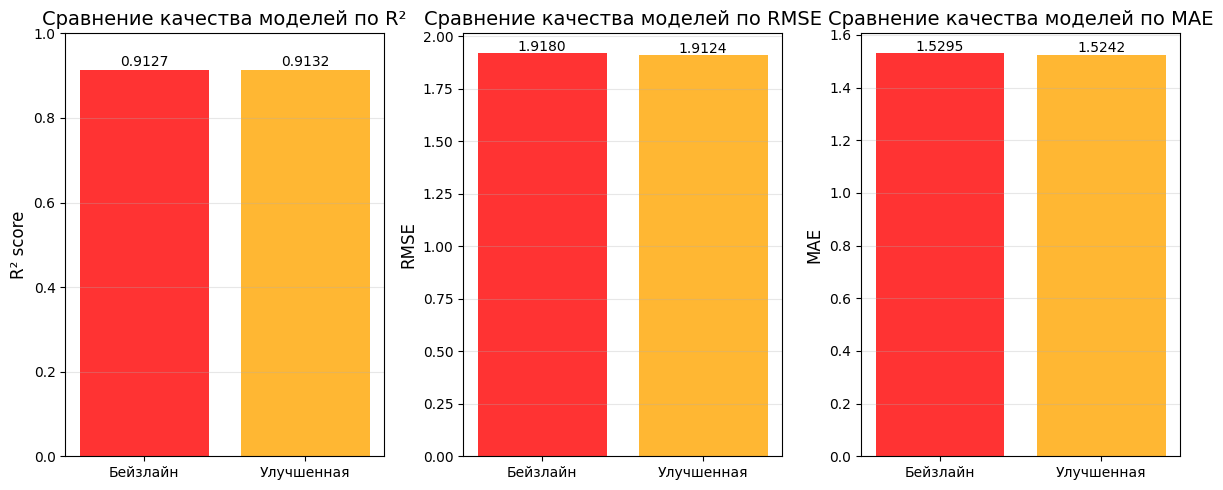

In [96]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
models = ['Бейзлайн',  'Улучшенная']
r2_values = [baseline_metrics['r2'],  improved_metrics['r2']]
colors = ['red', 'orange', 'green']

bars = plt.bar(models, r2_values, color=colors, alpha=0.8)
plt.ylabel('R² score', fontsize=12)
plt.title('Сравнение качества моделей по R²', fontsize=14)
plt.ylim(0, 1)
for bar, value in zip(bars, r2_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 3, 2)
rmse_values = [baseline_metrics['rmse'],  improved_metrics['rmse']]
bars = plt.bar(models, rmse_values, color=colors, alpha=0.8)
plt.ylabel('RMSE', fontsize=12)
plt.title('Сравнение качества моделей по RMSE', fontsize=14)
for bar, value in zip(bars, rmse_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 3, 3)
mae_values = [baseline_metrics['mae'],  improved_metrics['mae']]
bars = plt.bar(models, mae_values, color=colors, alpha=0.8)
plt.ylabel('MAE', fontsize=12)
plt.title('Сравнение качества моделей по MAE', fontsize=14)
for bar, value in zip(bars, mae_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

После оптимизации гиперпараметров все ключевые метрики модели улучшились примерно на 0.3%. Однако столь незначительный прирост производительности не имеет практической ценности для решения реальных задач.

### 4.	Имплементация алгоритма машинного обучения

In [97]:
#Имплементация алгоритма
class DecisionTreeRegressorCustom:

    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None
    #Вычисление MSE для узла
    def _mse(self, y):
        if len(y) == 0:
            return 0
        return np.mean((y - np.mean(y)) ** 2)
    #Нахождение лучшего разделения
    def _best_split(self, X, y):
        best_mse = float('inf')
        best_idx = None
        best_threshold = None

        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_mask = X[:, feature_idx] <= threshold
                right_mask = ~left_mask

                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                mse_left = self._mse(y[left_mask])
                mse_right = self._mse(y[right_mask])

                #Взвешенное MSE
                n_left, n_right = np.sum(left_mask), np.sum(right_mask)
                weighted_mse = (n_left * mse_left + n_right * mse_right) / (n_left + n_right)

                if weighted_mse < best_mse:
                    best_mse = weighted_mse
                    best_idx = feature_idx
                    best_threshold = threshold

        return best_idx, best_threshold, best_mse
    #Рекурсивное построение дерева
    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape

        #Условия остановки
        if (self.max_depth is not None and depth >= self.max_depth) or \
           n_samples < self.min_samples_split or \
           len(np.unique(y)) == 1:
            return np.mean(y)

        #Находим лучшее разделение
        best_idx, best_threshold, best_mse = self._best_split(X, y)

        if best_idx is None:
            return np.mean(y)

        #Разделяем данные
        left_mask = X[:, best_idx] <= best_threshold
        right_mask = ~left_mask

        #Рекурсивно строим поддеревья
        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return {
            'feature_idx': best_idx,
            'threshold': best_threshold,
            'left': left_subtree,
            'right': right_subtree
        }

    def _predict_sample(self, x, node):
        if not isinstance(node, dict):
            return node

        if x[node['feature_idx']] <= node['threshold']:
            return self._predict_sample(x, node['left'])
        else:
            return self._predict_sample(x, node['right'])

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.tree = self._build_tree(X, y)

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for sample in X:
            predictions.append(self._predict_sample(sample, self.tree))
        return np.array(predictions)

#Random Forest для регрессии
class RandomForestRegressorCustom:

    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2,
                 max_features=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []

        if random_state is not None:
            np.random.seed(random_state)
    #Создание бутстрап выборки
    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape

        #Определяем количество признаков для каждого дерева
        if self.max_features is None:
            max_features = int(np.sqrt(n_features))
        elif self.max_features == 'sqrt':
            max_features = int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            max_features = int(np.log2(n_features))
        else:
            max_features = self.max_features

        self.trees = []
        for i in range(self.n_estimators):
            #Бутстрап выборка
            X_boot, y_boot = self._bootstrap_sample(X, y)

            #Случайный выбор признаков
            feature_indices = np.random.choice(
                n_features, max_features, replace=False
            )
            X_boot_subset = X_boot[:, feature_indices]

            #Создание и обучение дерева
            tree = DecisionTreeRegressorCustom(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            tree.fit(X_boot_subset, y_boot)

            #Сохраняем дерево и индексы признаков
            self.trees.append({
                'tree': tree,
                'feature_indices': feature_indices
            })

    def predict(self, X):
        X = np.array(X)
        n_samples = X.shape[0]

        #Матрица прогнозов: [n_samples, n_estimators]
        predictions_matrix = np.zeros((n_samples, len(self.trees)))

        for i, tree_dict in enumerate(self.trees):
            tree = tree_dict['tree']
            feature_indices = tree_dict['feature_indices']
            X_subset = X[:, feature_indices]
            predictions_matrix[:, i] = tree.predict(X_subset)

        #Усреднение прогнозов
        return np.mean(predictions_matrix, axis=1)

In [98]:
#Обучение и предсказание кастомной модели
custom_tree = RandomForestRegressorCustom(n_estimators = 20)
custom_tree.fit(X_train, y_train)

y_pred_custom = custom_tree.predict(X_test)

In [99]:
#Метрики
custom_metrics = evaluate_model(y_test, y_pred_custom, "Custom RandomForest")


Custom RandomForest:
MAE: 2.5585
RMSE: 3.1920
R² Score: 0.7582


Данные метрики свидетельствуют о необходимости дальнейшей оптимизации модели для повышения её точности и стабильности.

In [100]:
print("\nРазница в метриках (кастомна реализация - sklearn):")
print(f"MAE: {mean_absolute_error(y_test, y_pred_custom) - mean_absolute_error(y_test, y_pred):.6f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_custom)) - np.sqrt(mean_squared_error(y_test, y_pred)):.6f}")
print(f"R²: {r2_score(y_test, y_pred_custom) - r2_score(y_test, y_pred):.6f}")


Разница в метриках (кастомна реализация - sklearn):
MAE: 1.029017
RMSE: 1.273958
R²: -0.154475


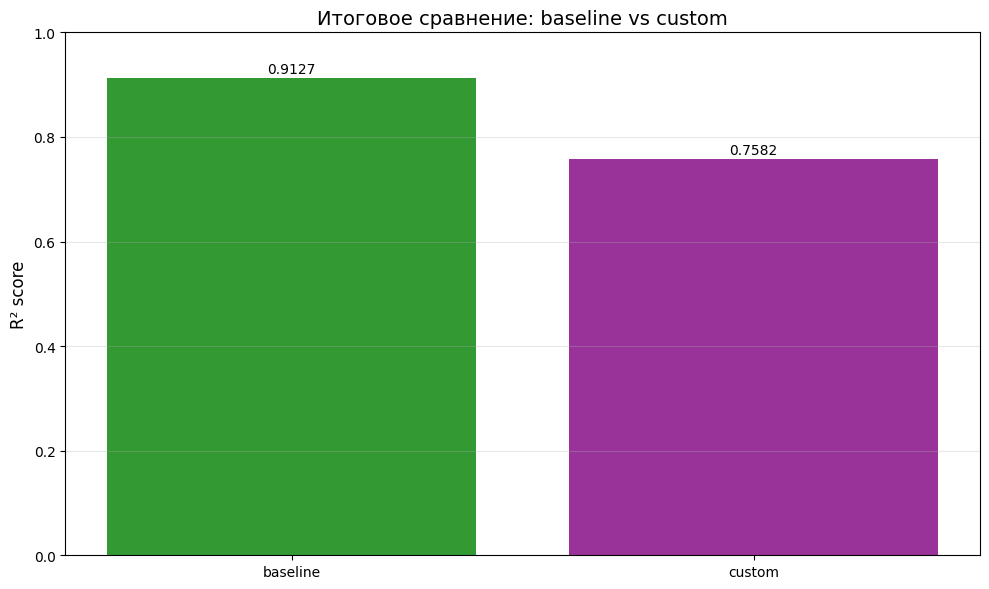

In [101]:
#Визуализация итогового сравнения
plt.figure(figsize=(10, 6))
models_final = ['baseline', 'custom']
r2_final = [baseline_metrics['r2'], custom_metrics['r2']]
colors_final = ['green', 'purple']

bars = plt.bar(models_final, r2_final, color=colors_final, alpha=0.8)
plt.ylabel('R² score', fontsize=12)
plt.title('Итоговое сравнение: baseline vs custom', fontsize=14)
plt.ylim(0, 1)
for bar, value in zip(bars, r2_final):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

По метрикам видно, что кастомная модель работает значительно хуже: MAE и RMSE более чем в 1.5 раза выше, а R² значительно ниже

In [102]:
#Используем все улучшения на кастомной модели
custom_model_improved = RandomForestRegressorCustom(n_estimators = 100, min_samples_split = 2, max_features = 'sqrt')
custom_model_improved.fit(X_train, y_train)

y_pred_custom_improved = custom_model_improved.predict(X_test)
custom_improved_metrics = evaluate_model(y_test, y_pred_custom_improved, "Custom Improved")


Custom Improved:
MAE: 2.5114
RMSE: 3.1372
R² Score: 0.7665


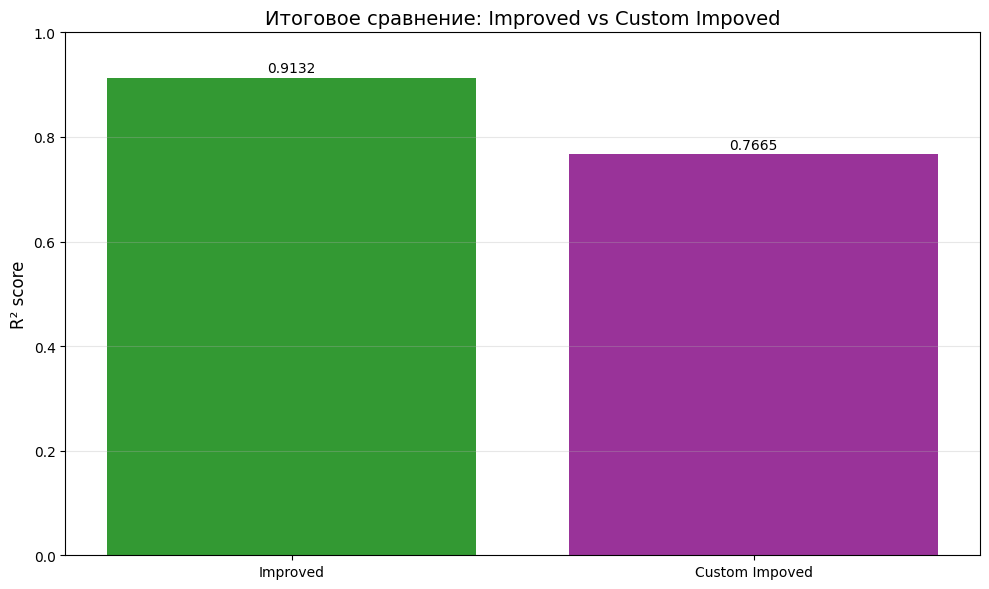

In [103]:
#Визуализация итогового сравнения
plt.figure(figsize=(10, 6))
models_final = ['Improved', 'Custom Impoved']
r2_final = [improved_metrics['r2'], custom_improved_metrics['r2']]
colors_final = ['green', 'purple']

bars = plt.bar(models_final, r2_final, color=colors_final, alpha=0.8)
plt.ylabel('R² score', fontsize=12)
plt.title('Итоговое сравнение: Improved vs Custom Impoved', fontsize=14)
plt.ylim(0, 1)
for bar, value in zip(bars, r2_final):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Даже после оптимизации кастомная реализация существенно уступает библиотечному аналогу и требует дальнейшей глубокой доработки для достижения сопоставимой точности.

In [104]:
final_comparison = pd.DataFrame({
    'Baseline': baseline_metrics,
    'Improved': improved_metrics,
    'Custom': custom_metrics,
    'Improved Custom': custom_improved_metrics
}).T

print("Сравнение метрик всех версий:")
print(final_comparison)

Сравнение метрик всех версий:
                      mae      rmse        r2
Baseline         1.529516  1.918016  0.912706
Improved         1.524230  1.912393  0.913217
Custom           2.558534  3.191975  0.758231
Improved Custom  2.511358  3.137159  0.766464


Базовая модель RandomForest демонстрирует высокое качество предсказаний, а её оптимизированная версия показывает незначительное улучшение всех метрик. Кастомная реализация алгоритма существенно уступает библиотечным аналогам, хотя применение техник улучшения базовой модели позволило немного повысить её точность.